# Importar bibliotecas

In [49]:
import pandas as pd
import numpy as np

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
import seaborn as sns

In [54]:
import matplotlib.pyplot as plt

# Ler CSV

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
dfrnn = pd.read_csv('/content/drive/MyDrive/Modulo6/BaseBTG.csvsentence_vectors.csv')

In [57]:
dfrnn

,Frase,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,...,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50,sentimento
0,"['quer', 'visualizar', 'saldo', 'todas', 'cont...",-0.327200,0.405911,0.311722,0.127294,0.116280,-0.553932,0.173491,1.114308,-0.489034,...,-0.442531,-0.032067,0.201052,0.352574,-0.428104,-0.667955,0.043698,0.253030,0.347920,1
1,"['precos', 'excelentes', 'hora', 'investir', '...",-0.160159,0.212916,0.189038,-0.013707,0.038440,-0.279692,0.044877,0.446087,-0.094030,...,-0.160771,-0.062100,0.049718,0.185117,-0.198394,-0.366286,-0.001400,0.107181,0.132446,0
2,"['onde', 'consigo', 'realizar', 'simulacao', '...",-0.215426,0.289502,0.246845,-0.016085,0.057726,-0.382279,0.054546,0.590855,-0.120499,...,-0.211942,-0.081096,0.065853,0.243027,-0.270421,-0.495752,0.009569,0.149597,0.175471,0
3,"['taxa', 'adm', 'alta', 'ainda', 'taxa', 'perf...",-0.283998,0.374308,0.370961,-0.001956,0.095912,-0.515131,0.123847,0.868959,-0.165838,...,-0.303832,-0.128369,0.075163,0.349559,-0.364945,-0.654165,-0.015403,0.181647,0.280221,0
4,"['fire', 'faca', 'parte', 'clube', 'vantagens'...",-0.204356,0.251492,0.243784,0.013492,0.037201,-0.343080,0.089412,0.571961,-0.145648,...,-0.228462,-0.096629,0.087635,0.237198,-0.259357,-0.484709,-0.005115,0.133282,0.161880,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026,"['noite', 'encontros', 'conhecimento', 'onde',...",-0.232641,0.314391,0.272312,-0.026808,0.055646,-0.410595,0.059567,0.642099,-0.126797,...,-0.234917,-0.095607,0.072642,0.269006,-0.289531,-0.548837,0.000723,0.157422,0.187002,0
4027,"['erros', 'financeiros', 'eliminar', 'antes', ...",-0.377352,0.495599,0.345589,0.146776,0.143164,-0.699373,0.188399,1.271856,-0.546306,...,-0.524392,-0.010737,0.220825,0.412966,-0.509596,-0.769547,0.120072,0.375267,0.377073,0
4028,"['grato', 'todo', 'esforco', 'voce', 'rendeu',...",-0.244189,0.338319,0.284006,-0.039514,0.070321,-0.442563,0.051534,0.680711,-0.120037,...,-0.238724,-0.090154,0.062620,0.285839,-0.302342,-0.567720,0.004311,0.168621,0.204494,0
4029,"['backhand_index_pointing_rightguadakan', 'che...",-0.145045,0.193842,0.167018,-0.001909,0.032079,-0.254444,0.047387,0.407892,-0.102315,...,-0.156446,-0.054958,0.054776,0.163896,-0.185619,-0.339818,0.005518,0.101319,0.117867,0


# Naive Bayes

In [58]:
X = np.array(dfrnn.drop(['Frase', 'sentimento'], axis=1))
y = np.array(dfrnn['sentimento'])

#Divida o DataFrame em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#Crie uma instância do classificador Naive Bayes Gaussiano
gnb = GaussianNB()

#Treine o classificador utilizando os dados de treinamento
gnb.fit(X_train, y_train)

#Faça previsões nos dados de teste
y_pred = gnb.predict(X_test)

#Calcule a precisão do classificador
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.4758364312267658


In [59]:
#Crie a matriz de confusão
from sklearn.metrics import accuracy_score, confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[250 389]
 [ 34 134]]


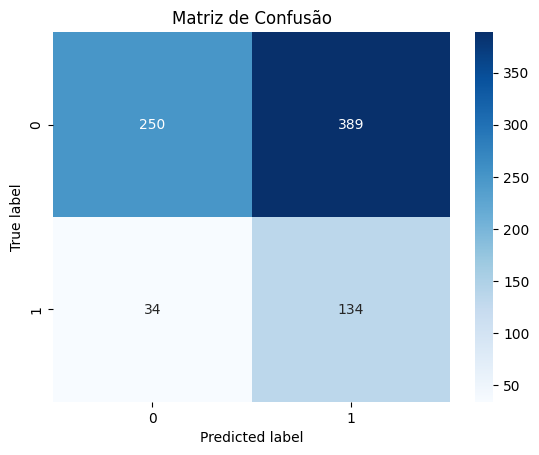

In [60]:
# Plotar a matriz de confusão com seaborn
import seaborn as sns
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Matriz de Confusão')
plt.show()